In [96]:
from scipy.io import arff
import pandas as pd
import numpy as np # linear algebra

In [50]:
data = arff.loadarff(r"EEG Eye State.arff")
df = pd.DataFrame(data[0])
print(df)

           AF3       F7       F3      FC5       T7       P7       O1       O2  \
0      4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1      4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2      4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3      4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4      4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14975  4281.03  3990.26  4245.64  4116.92  4333.85  4614.36  4074.87  4625.64   
14976  4276.92  3991.79  4245.13  4110.77  4332.82  4615.38  4073.33  4621.54   
14977  4277.44  3990.77  4246.67  4113.85  4333.33  4615.38  4072.82  4623.59   
14978  4284.62  3991.79  4251.28  4122.05  4334.36  4616.41  4080.51  4628.72   
14979  4287.69  3997.44  4260.00  4121.03  4333.33  4616.41  4088.72  4638.46   

            P8       T8    

In [51]:
name = df.columns
name.delete(len(name)-1)
df_norm = df

In [33]:
np.array(df[name[0]])

array([4329.23, 4324.62, 4327.69, ..., 4277.44, 4284.62, 4287.69])

## Cleaning

In [5]:
index_del = [899, 10387, 11510, 13180]

In [24]:
df_open_eye = df[df.eyeDetection==b'0']
df_close_eye = df[df.eyeDetection==b'1']

## Normalization 
(All data - mean)/standart deviation 

In [10]:
from sklearn import preprocessing

In [75]:
x_array = np.array(df.iloc[:,:14])
print(x_array)
x_array.shape

[[4329.23 4009.23 4289.23 ... 4280.51 4635.9  4393.85]
 [4324.62 4004.62 4293.85 ... 4279.49 4632.82 4384.1 ]
 [4327.69 4006.67 4295.38 ... 4282.05 4628.72 4389.23]
 ...
 [4277.44 3990.77 4246.67 ... 4257.95 4591.79 4339.49]
 [4284.62 3991.79 4251.28 ... 4267.18 4596.41 4350.77]
 [4287.69 3997.44 4260.   ... 4274.36 4597.95 4350.77]]


(14980, 14)

In [73]:
normalized_arr = preprocessing.normalize(x_array)
print(normalized_arr)

[[0.26779408 0.24799977 0.26531979 ... 0.26478039 0.28676382 0.27179129]
 [0.26774589 0.24793405 0.26584085 ... 0.2649518  0.28682717 0.27142841]
 [0.26797826 0.24810013 0.26597757 ... 0.26515215 0.28661857 0.27178893]
 ...
 [0.26634659 0.2484963  0.26443061 ... 0.26513299 0.28592046 0.27021031]
 [0.26644095 0.24823119 0.26436768 ... 0.26535643 0.28582974 0.27055451]
 [0.26635486 0.24832429 0.26463473 ... 0.26552679 0.28562847 0.27027344]]


In [ ]:
for i,n in enumerate(name):
   x = np.array(df[n])
   data_matrix1[i,:] = preprocessing.normalize(x)

In [92]:
data_matrix

array([[0.00293429, 0.01170422, 0.56739848, ..., 0.03074472, 0.01712667,
        0.0038339 ],
       [0.00108436, 0.1120522 , 0.6713903 , ..., 0.0061918 , 0.0145777 ,
        0.00548894],
       [0.00231631, 0.06742891, 0.70582915, ..., 0.06781481, 0.01118458,
        0.00461813],
       ...,
       [0.0178483 , 0.41353148, 0.39058683, ..., 0.51230804, 0.01937827,
        0.01306139],
       [0.01496707, 0.39132867, 0.28682009, ..., 0.29012821, 0.01555481,
        0.01114664],
       [0.01373512, 0.26834254, 0.09054115, ..., 0.11729493, 0.01428032,
        0.01114664]])

In [167]:
data_matrix = np.zeros((len(df),(len(name)-1)))
for i,n in enumerate(name):
   x = np.array(df[n])
   data_matrix[:,i] = abs(x - np.mean(x))/np.std(x)

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [40]:
x = np.array(df[name[0]])
y = (x - np.mean(x))/np.std(x)

In [87]:
data_matrix1 = np.zeros((len(name)-1,len(df)))

#### Метод главных компонент (англ. principal component analysis, PCA) — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации. 
Вычисление главных компонент может быть сведено к вычислению сингулярного разложения матрицы данных[⇨] или к вычислению собственных векторов и собственных значений ковариационной матрицы исходных данных

In [9]:
import numpy as np
from sklearn.decomposition import PCA

In [143]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array(df.iloc[:,:14]).T#data_matrix
pca = PCA(n_components=14)
pca.fit(X)
PCX = pca.components_

In [166]:
PCXt = PCX.T
print(PCXt)

[[-3.91284504e-04  2.11139044e-04  1.14796563e-04 ... -4.02426406e-02
  -2.62402057e-02 -1.87801377e-01]
 [-3.83143505e-04  2.08030190e-04  1.01420396e-04 ... -3.61266809e-02
  -2.86854051e-02  5.16308559e-01]
 [-3.74384880e-04  2.14867754e-04  1.10781731e-04 ... -3.42258261e-02
  -2.43381209e-02  1.92214899e-02]
 ...
 [-3.96130204e-04  2.17552982e-04  4.20054181e-05 ... -1.33774602e-02
  -3.48528640e-03  2.78139962e-04]
 [-3.91477257e-04  2.22144348e-04  5.18850384e-05 ... -1.44503161e-02
  -3.64933850e-04 -5.02119606e-04]
 [-3.93708297e-04  2.12918743e-04  5.34263216e-05 ... -1.75038132e-02
  -4.05571325e-03  5.28418112e-04]]


In [147]:
len(PCXt[:,5])

14980

In [141]:
len(x)

14

In [1]:
from minisom import MiniSom

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
data = PCX[[1,3]].T

In [121]:
data.shape

(14980, 2)

In [125]:
data = np.array(df.iloc[:,:14])

In [126]:
data.shape

(14980, 14)

In [169]:
data = 10*data_matrix

# Train SOM

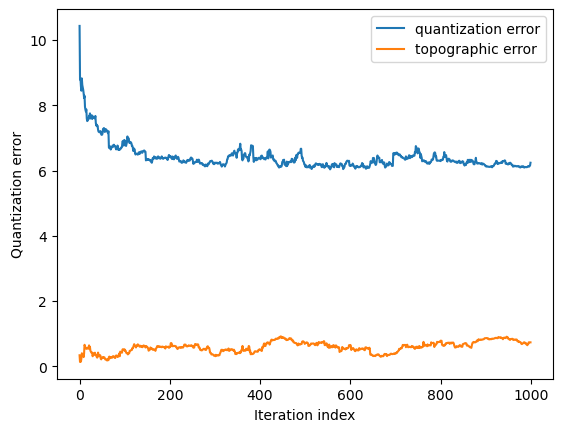

In [170]:
# I use linear som topography
som_shape = (1, 8)

som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=0.5, learning_rate=0.5)

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('Quantization error')
plt.xlabel('Iteration index')
plt.legend()
plt.show()

In [128]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T

In [130]:
winner_coordinates.shape

(2, 14980)

In [132]:
len(np.ravel_multi_index(winner_coordinates, som_shape))

14980

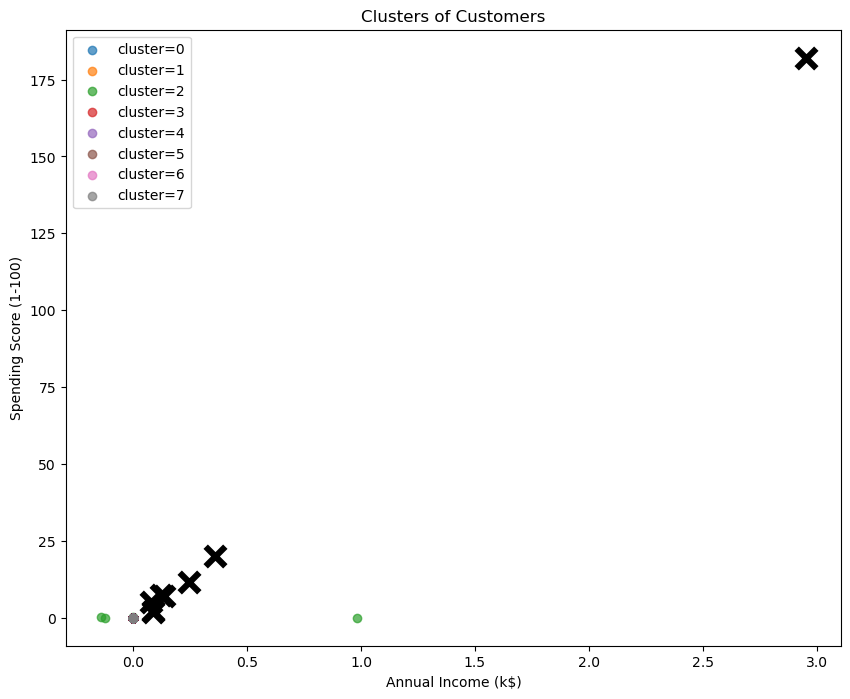

In [174]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T

# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

# Plotting the clusters 
plt.figure(figsize=(10,8))

for c in np.unique(cluster_index):
    plt.scatter(PCXt[cluster_index == c, 0],
                PCXt[cluster_index == c, 3], label='cluster='+str(c), alpha=.7)

# Plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=10, linewidths=20, color='k') # label='centroid'
    
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()

In [157]:
print(np.unique(cluster_index))

[3 4]


In [159]:
len(cluster_index)

14980

In [175]:
som.get_weights().shape

(1, 8, 14)